In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
def plot_weekend(data,fecha1):
    fig, ax = plt.subplots(figsize=(12,4))

    fecha1 = parse(fecha1) - pd.Timedelta('1D')
    fecha2 = fecha1 + pd.Timedelta('4D')
    ax.set_xlim(fecha1,fecha2)

    ax.scatter(data.index,data.TCAire)

In [3]:
# Datos de mediciones de fin de semana
weekend_data = pd.read_csv('../data/weekends.csv',index_col=0,parse_dates=True)

In [4]:
nombres = np.genfromtxt('../idf/cubiculo_original/cubiculo.csv',dtype='U',delimiter=',',max_rows=1,)
nombres

for i,nombre in enumerate(nombres):
    print(i,nombre)
    
nombres[0]  = 'tiempo'
nombres[1]  = 'To'
nombres[2]  = 'Ti'

0 Date/Time
1 Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)
2 THERMAL ZONE: JORGE:Zone Mean Air Temperature [C](TimeStep)


In [7]:
# Llamada de datos de e+
simulate = pd.read_csv('../idf/cubiculo_original/cubiculo.csv',names=nombres,skiprows=1)
simulate.tiempo = simulate.tiempo.str.replace('24:00:00','23:59:59')
simulate.tiempo = '2019-'+simulate.tiempo
simulate.tiempo = pd.to_datetime(simulate.tiempo,format='%Y- %m/%d %H:%M:%S')
simulate.tiempo = simulate.tiempo-pd.Timedelta('10minute')
simulate.set_index('tiempo',inplace=True)
# Hago columna de dias para hacer mascara (opcional)
#simulate['dia'] = simulate.index.day_of_week
# solo dines de semana de simulaciones
weekend_simu = simulate[simulate.index.day_of_week>=5]
weekend_simu

,To,Ti
tiempo,,
2019-05-04 00:00:00,25.4,25.659469
2019-05-04 00:10:00,25.0,25.584634
2019-05-04 00:20:00,24.9,25.519720
2019-05-04 00:30:00,24.6,25.488541
2019-05-04 00:40:00,24.7,25.441456
...,...,...
2019-06-23 23:10:00,23.6,25.081529
2019-06-23 23:20:00,23.4,25.002876
2019-06-23 23:30:00,23.3,24.924810


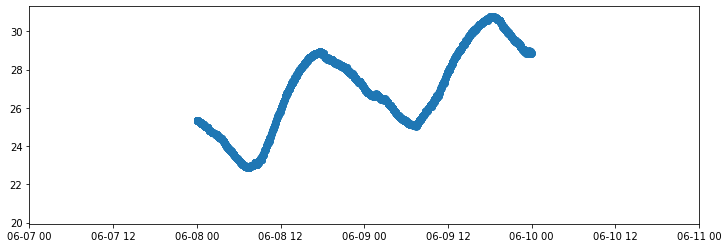

In [11]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-08') - pd.Timedelta('1D')
fecha2 = fecha1 + pd.Timedelta('4D')

ax.set_xlim(fecha1,fecha2)
ax.scatter(weekend_data.index,weekend_data.TCAire)